In [1]:
from scipy.integrate import quad
from matplotlib import pyplot as plt
import math
import numpy as np

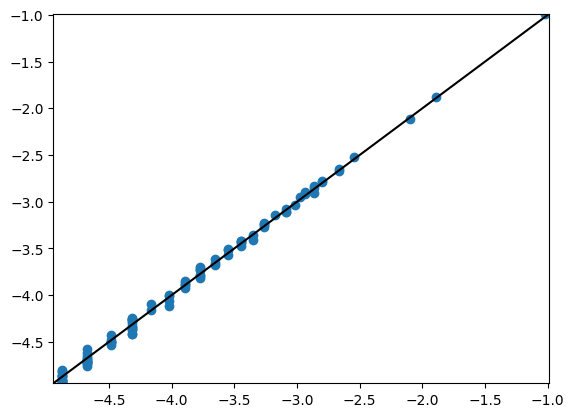

In [2]:
itg0 = lambda func, x: quad(func, 0,x)[0]
lmd = lambda x: math.exp(-x)*2*x #+0.5*x**2
# exp_hx = 12.9
# hx = math.log(exp_hx)
h = lambda x: lmd(x)*exp_hx
gt = lambda x: itg0(lmd, x)
S = lambda x: math.exp(-exp_hx*gt(x))
original_integral_func = lambda x:S(x)*h(x)*x
f = lambda x: h(x)*S(x)

pxs = []
pys = []
exp_hxs = np.random.uniform(1,100,100)
for exp_hx in exp_hxs:
    hx = math.log(exp_hx)
    xs = [i/100 for i in range(1000)]
    ps = np.array([f(x) for x in xs])
    ps = ps/ps.sum()
    sample = np.random.choice(xs, size=10000, replace=True, p=ps)
    me = np.median(sample)
    tp_left = math.log(gt(me))
    tp_right = math.log(math.log(2)) - hx
    pxs.append(tp_left)
    pys.append(tp_right)
plt.scatter(pxs, pys)
tp_min = min(min(pxs), min(pys))
tp_max = max(max(pxs), max(pys))
plt.xlim(tp_min,tp_max)
plt.ylim(tp_min,tp_max)
plt.plot([tp_min,tp_max], [tp_min,tp_max], color="black")
plt.show()

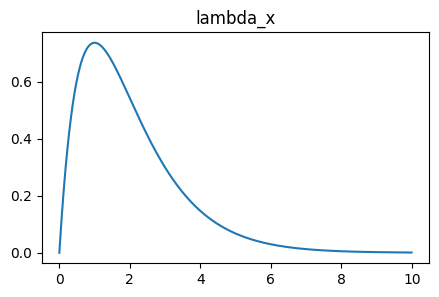

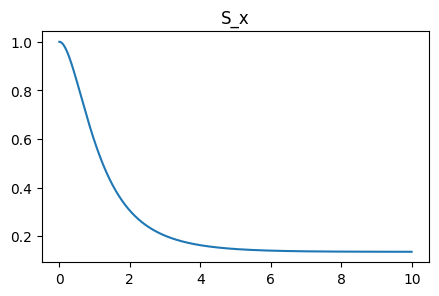

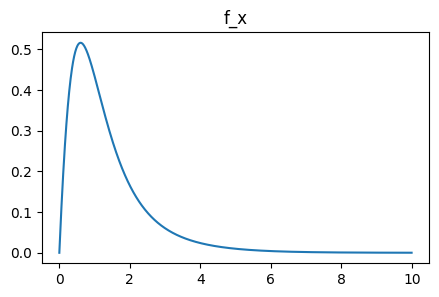

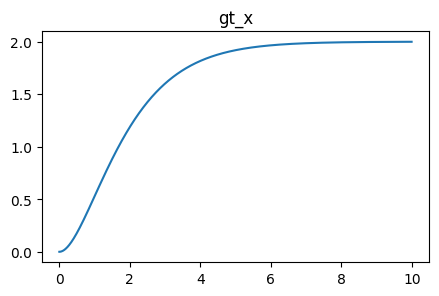

In [3]:
# plot functions
exp_hx = 1
hx = math.log(exp_hx)
xs = [i/100 for i in range(1000)]
plt.figure(figsize=(5,3))
plt.plot(xs, [lmd(x) for x in xs])
plt.title("lambda_x")
plt.show()
plt.figure(figsize=(5,3))
plt.plot(xs, [S(x) for x in xs])
plt.title("S_x")
plt.show()
plt.figure(figsize=(5,3))
plt.plot(xs, [f(x) for x in xs])
plt.title("f_x")
plt.show()
plt.figure(figsize=(5,3))
plt.plot(xs, [gt(x) for x in xs])
plt.title("gt_x")
plt.show()

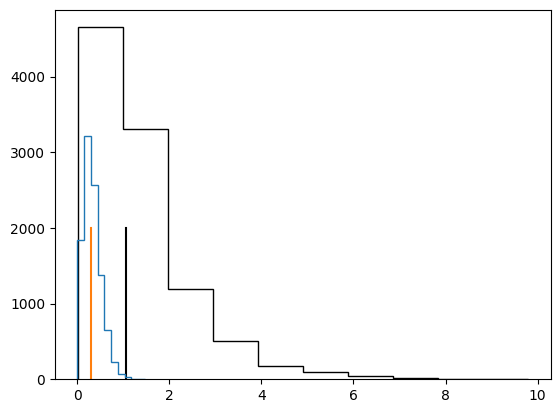

In [4]:
#
exp_hx = 1
hx = math.log(exp_hx)
xs = [i/1000 for i in range(10000)]
ps = np.array([f(x) for x in xs])
ps = ps/ps.sum()
sample = np.random.choice(xs, size=10000, replace=True, p=ps)
# sample = np.log([gt(x) for x in sample])
me = np.median(sample)
# ave = np.mean(sample)
_ = plt.hist(sample, histtype="step", color="black")
plt.plot([me, me], [0,2000], color="black")

exp_hx = 10
hx = math.log(exp_hx)
xs = [i/1000 for i in range(10000)]
ps = np.array([f(x) for x in xs])
ps = ps/ps.sum()
sample = np.random.choice(xs, size=10000, replace=True, p=ps)
# sample = np.log([gt(x) for x in sample])
me = np.median(sample)
# me_cal = math.log(math.log(2)) - hx
# ave = np.mean(sample)
_ = plt.hist(sample, histtype="step")
plt.plot([me, me], [0,2000])
# plt.plot([me_cal, me_cal], [0,1000])
# plt.plot([ave, ave], [0,2000], color="yellow")
plt.show()

In [5]:
# median as the criterion
pxs = []
pys = []
exp_hxs = np.exp(np.random.uniform(1,10,8000))
tp_samples = []
risks = []
for exp_hx in exp_hxs:
    hx = math.log(exp_hx)
    xs = [i/100 for i in range(1000)]
    ps = np.array([f(x) for x in xs])
    ps = ps/ps.sum()
    sample = np.random.choice(xs, size=1, replace=True, p=ps)
    tp_right = math.log(math.log(2)) - hx
    tp_real = math.log(gt(sample[0]))
    pxs.append(tp_real)
    pys.append(tp_right)
    tp_samples.append(sample[0])
    risks.append(hx)
    

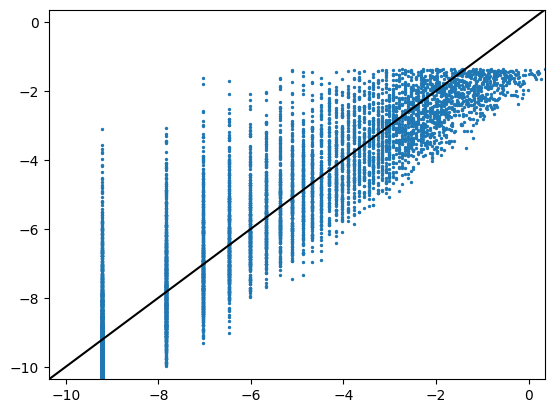

In [6]:
# pxs = np.exp(pxs)
# pys = np.exp(pys)
plt.scatter(pxs, pys, s=2)
tp_min = min(min(pxs), min(pys))
tp_max = max(max(pxs), max(pys))
plt.xlim(tp_min,tp_max)
plt.ylim(tp_min,tp_max)
plt.plot([tp_min,tp_max], [tp_min,tp_max], color="black")
plt.show()

In [7]:
from sksurv.metrics import concordance_index_censored as hc_index

In [11]:
hc_index([True]*len(tp_samples), tp_samples, -np.array(pys))

(0.8962798024882482, 26252039, 3037965, 0, 0)

C:\Users\wwy10\AppData\Local\Temp\ipykernel_12024\336857569.py:13: RuntimeWarning: invalid value encountered in scalar divide
  tp_h0 = tp_event / tp_domin


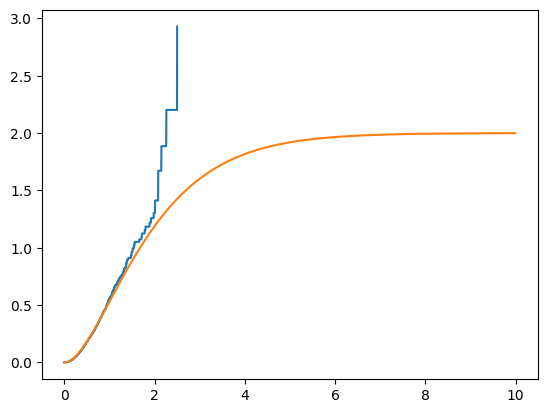

In [32]:
# estimation of the baseline hazard using the formula
real_t = np.array(tp_samples) # a list of time
real_s = np.array([True]*len(tp_samples)) # a list of event indicators, True for event and False for censoring
reso = 1000
time_unique = [i/reso + 1/reso/2 for i in range(reso*8)]# list(set(real_t))
time_unique.sort()
base_h0 = [[],[]]
risks = np.array(risks)
for i in range(len(time_unique)):
    tp_time = time_unique[i]
    tp_event = real_s[(real_t>=tp_time-1/reso/2) * (real_t<tp_time+1/reso/2)].sum()
    tp_domin = np.exp(risks[real_t>=tp_time - 1/reso/2]).sum()
    tp_h0 = tp_event / tp_domin
    base_h0[0].append(tp_time)
    base_h0[1].append(tp_h0)

base_h0 = np.array(base_h0)
cumu_h0 = np.cumsum(base_h0, axis=1)
cumu_h0[0] = base_h0[0]
plt.plot(base_h0[0], cumu_h0[1])
plt.plot(xs, [gt(x) for x in xs])
plt.plot()
plt.show()

In [33]:
hazard_dict = {cumu_h0[0][i]:cumu_h0[1][i] for i in range(len(cumu_h0[0]))}
log_gT = []
log2_minus_hx = []
loglog2 = math.log(math.log(2))
for i in range(len(tp_samples)):
    tp_gg = tp_samples[i]//(1/reso)/reso+1/reso/2
    if tp_gg in hazard_dict:
        tp_logT = math.log(hazard_dict[tp_gg])
        tp_log2_minus_hx = loglog2 - risks[i]
        log_gT.append(tp_logT)
        log2_minus_hx.append(tp_log2_minus_hx)

In [34]:
tp_gg

0.2495

In [35]:
hazard_dict

{0.0005: 0.0,
 0.0015: 0.0,
 0.0025: 0.0,
 0.0035: 0.0,
 0.0045000000000000005: 0.0,
 0.0055: 0.0,
 0.006500000000000001: 0.0,
 0.0075: 0.0,
 0.0085: 0.0,
 0.0095: 0.0,
 0.0105: 9.635053079661614e-05,
 0.0115: 9.635053079661614e-05,
 0.0125: 9.635053079661614e-05,
 0.0135: 9.635053079661614e-05,
 0.0145: 9.635053079661614e-05,
 0.0155: 9.635053079661614e-05,
 0.0165: 9.635053079661614e-05,
 0.0175: 9.635053079661614e-05,
 0.0185: 9.635053079661614e-05,
 0.0195: 9.635053079661614e-05,
 0.0205: 0.0003321239240741212,
 0.021500000000000002: 0.0003321239240741212,
 0.0225: 0.0003321239240741212,
 0.0235: 0.0003321239240741212,
 0.0245: 0.0003321239240741212,
 0.025500000000000002: 0.0003321239240741212,
 0.0265: 0.0003321239240741212,
 0.0275: 0.0003321239240741212,
 0.0285: 0.0003321239240741212,
 0.029500000000000002: 0.0007390659025286269,
 0.0305: 0.0011460078809831327,
 0.0315: 0.0011460078809831327,
 0.0325: 0.0011460078809831327,
 0.0335: 0.0011460078809831327,
 0.0345: 0.0011460078

In [36]:
tp_index = 3492
tp_gg = tp_samples[tp_index]//(1/reso)/reso+1/reso/2
print(hazard_dict[tp_gg])
print(gt(tp_samples[tp_index]))

0.0017642519740122672
0.0015579665631677245


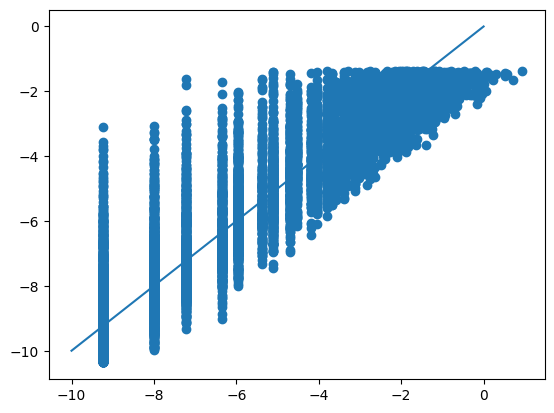

In [37]:
plt.scatter(log_gT, log2_minus_hx)
plt.plot([-10,0], [-10,0])

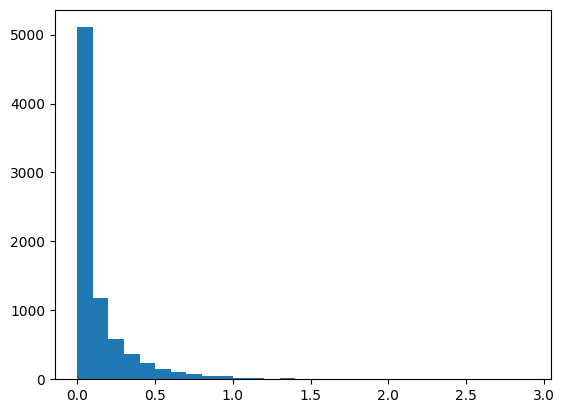

In [21]:
_ = plt.hist(tp_samples, bins=[x/10 for x in range(30)])

In [146]:
(real_t>0.5) * (real_t<0.6)

array([False, False, False, ..., False, False, False])